# Labor 3: EMG

Jakob Weninger  
Pia Schratt  
Janick Hoffmann


Anmerkung: Die Beantwortung der Fragen ist quasi unverändert aus dem vollständigen Laborbericht übernommen und dienen hier nur der Vollständigkeit der Abgabe.

Zur Unterstützung wurden dabei KI-Assisten verwendet.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.integrate
import os
from scipy import fftpack
# Damit Plots direkt angezeigt werden
%matplotlib inline 

# -----------------------------------------------------------
# KONFIGURATION
# -----------------------------------------------------------
DATEI_PFAD = r"C:\\Users\\janic\\Documents\\VSStudio\\sem 3\\Labreports\\Labreports\\Lab3_Biosignal\\files"  # Pfad anpassen, falls nötig
SFREQ = 1000       # 1000 Hz Abtastrate

# -----------------------------------------------------------
# FUNKTIONEN
# -----------------------------------------------------------
def get_power(data, sfreq):
    sig_fft = fftpack.fft(data)
    
    # And the power (sig_fft is of complex dtype)
    power = np.abs(sig_fft)
    
    # The corresponding frequencies
    sample_freq1 = fftpack.fftfreq(data.size, d=1/sfreq)
    frequencies = sample_freq1[sample_freq1 > 0]
    power = power[sample_freq1 > 0]
    return power, frequencies

def load_and_concat(filenames, folder_path):
    data_list = []
    for f in filenames:
        full_path = os.path.join(folder_path, f)
        if os.path.exists(full_path):
            try:
                df = pd.read_csv(full_path, sep=';')
                col = 'adc' if 'adc' in df.columns else df.columns[1]
                data_list.append(df[col].values)
            except:
                data_list.append(np.zeros(1000))
        else:
            data_list.append(np.zeros(1000))
    return np.concatenate(data_list) if data_list else np.array([])

def process_emg_signal(data, sfreq):
    if len(data) == 0: return np.zeros(1000), np.zeros(1000), np.zeros(1000), np.zeros(1000)
    data = data - np.mean(data) # Offset
    b, a = scipy.signal.butter(4, [20, 450], btype='bandpass', fs=sfreq)
    filt = scipy.signal.filtfilt(b, a, data) # Filter
    rect = np.abs(filt) # Gleichrichten
    b_e, a_e = scipy.signal.butter(4, 3, btype='lowpass', fs=sfreq)
    env = scipy.signal.filtfilt(b_e, a_e, rect) # Einhüllende
    return data, filt, rect, env

def auto_get_bursts(env_data, n_bursts=3):
    starts, ends = [], []
    if len(env_data) == 0: return [], []
    chunk_size = len(env_data) // n_bursts
    burst_width = 2000 
    for i in range(n_bursts):
        s_idx = i * chunk_size
        e_idx = (i + 1) * chunk_size
        chunk = env_data[s_idx:e_idx]
        if len(chunk) > 0 and np.max(chunk) > 0:
            peak = np.argmax(chunk) + s_idx
            s = max(0, peak - burst_width // 2)
            e = min(len(env_data), peak + burst_width // 2)
            starts.append(s); ends.append(e)
        else:
            starts.append(0); ends.append(100)
    return np.array(starts), np.array(ends)

# -----------------------------------------------------------
# HAUPTPROGRAMM
# -----------------------------------------------------------
print("Lade Daten...")
f_j_mvc = ['Janick_MVC1.csv', 'Janick_MVC2.csv', 'Janick_MVC3.csv']
f_j_w = ['Janick_RM_25.csv', 'Janick_RM_50.csv', 'Janick_RM_75.csv']
f_j_fat = ['Janick_Ermüdung1.csv', 'Janick_Ermüdung2.csv', 'Janick_Ermüdung3.csv']
f_jakob = ['Jakob_MVC1.csv', 'Jakob_MVC2.csv', 'Jakob_MVC3.csv']
f_pia = ['Pia_MVC1.csv', 'Pia_MVC2.csv', 'Pia_MVC3.csv']

# Laden & Verarbeiten
j_mvc_raw = load_and_concat(f_j_mvc, DATEI_PFAD)
j_w_raw = load_and_concat(f_j_w, DATEI_PFAD)
j_fat_raw = load_and_concat(f_j_fat, DATEI_PFAD)
jakob_raw = load_and_concat(f_jakob, DATEI_PFAD)
pia_raw = load_and_concat(f_pia, DATEI_PFAD)

j_data_umnull, j_data_filt, j_data_rect, j_mvc_env = process_emg_signal(j_mvc_raw, SFREQ)
_, _, _, j_w_env = process_emg_signal(j_w_raw, SFREQ)
_, j_fat_filt, _, j_fat_env = process_emg_signal(j_fat_raw, SFREQ)
_, _, _, jakob_env = process_emg_signal(jakob_raw, SFREQ)
_, _, _, pia_env = process_emg_signal(pia_raw, SFREQ)

# Bursts wurden gesondert an anderer stelle ermittelt
j_mvc_s= [6021, 30918, 57010]
j_mvc_e = [16989, 42918, 68510]
j_w_s = [5009, 49212, 90445]
j_w_e = [27101, 70212, 115445]
j_fat_s = [8106, 65327, 129638]
j_fat_e = [47994, 102327, 149638]
jakob_s =[4812, 34144, 59233]
jakob_e = [16832,45144,68223 ]
pia_s = [7052, 30112, 54709]
pia_e = [13101, 35112, 66209 ]

# MVC Berechnung
def calc_mvc(env, s, e):
    vals = [np.mean(env[start:end]) for start, end in zip(s, e) if end > start]
    return np.mean(vals) if vals else 0

mvc_j = calc_mvc(j_mvc_env, j_mvc_s, j_mvc_e)
mvc_jakob = calc_mvc(jakob_env, jakob_s, jakob_e)
mvc_pia = calc_mvc(pia_env, pia_s, pia_e)

Lade Daten...


In [2]:
print(j_mvc_s)

[6021, 30918, 57010]


## Aufgabe 1: Diagramm

Siehe Laborbericht



## Aufgabe 2: Vorverarbeitete Daten
Diagramm mit Mittelwert entfernen, geflitert, gleichgerichtet, Hüllkurve


AUFGABE: Abgabe 3, Punkt 2
BESCHREIBUNG: Vorverarbeitung der Rohdaten (Offset, Filter, Gleichrichten, Einhüllende).


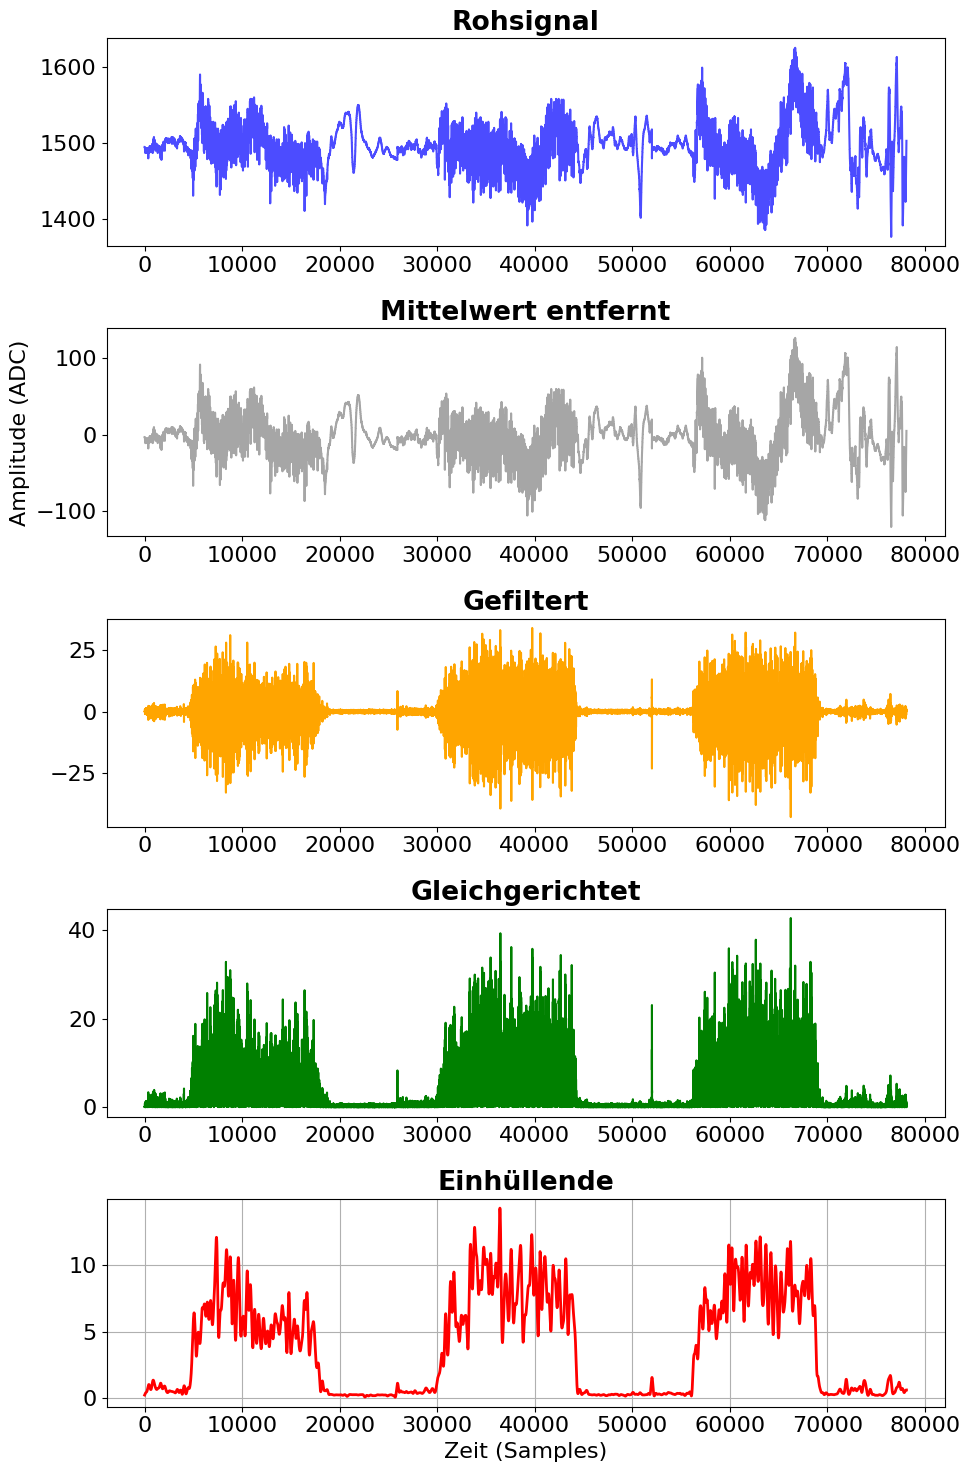

In [3]:
# --- PLOT 1: Punkt 2 (Vorverarbeitung) ---
print("\n" + "="*60)
print("AUFGABE: Abgabe 3, Punkt 2")
print("BESCHREIBUNG: Vorverarbeitung der Rohdaten (Offset, Filter, Gleichrichten, Einhüllende).")
print("="*60)
plt.figure(figsize=(10, 15))
#fontsize der achsen anpassen
plt.rcParams.update({'font.size': 16})
plt.subplot(5,1,1)
plt.plot(j_mvc_raw, color='blue', alpha=0.7)
plt.title('Rohsignal', fontweight='bold')
plt.subplot(5,1,2)
plt.plot(j_data_umnull, color='gray', alpha=0.7)
plt.title('Mittelwert entfernt', fontweight='bold')
plt.ylabel('Amplitude (ADC)')
plt.subplot(5,1,4)
plt.plot(j_data_rect, color='green')
plt.title('Gleichgerichtet', fontweight='bold')
plt.subplot(5,1,3)
plt.plot(j_data_filt, color='orange')
plt.title('Gefiltert', fontweight='bold')
plt.subplot(5,1,5)
plt.plot(j_mvc_env, color='red', linewidth=2)
plt.title('Einhüllende', fontweight='bold')
plt.xlabel('Zeit (Samples)')
plt.tight_layout()
plt.grid()
plt.savefig('Aufgabe2.png')
plt.show()

## Aufgabe 3:
Tabelle

In [4]:
print("\n--- 1. MVC Werte (Abgabe 3, Punkt 3) ---")
print(f"Janick: {mvc_j:.2f} | Jakob: {mvc_jakob:.2f} | Pia: {mvc_pia:.2f}")

# Achtung normale Werte liegen um 50, ein zu geringer wert deutet auf schlechte Messung hin


--- 1. MVC Werte (Abgabe 3, Punkt 3) ---
Janick: 7.47 | Jakob: 6.22 | Pia: 7.01


## Aufgabe 4 Aufbau des MVC Experiments:

Erklärung aufbau

## Aufgabe 5 Relative Muskelaktivierung

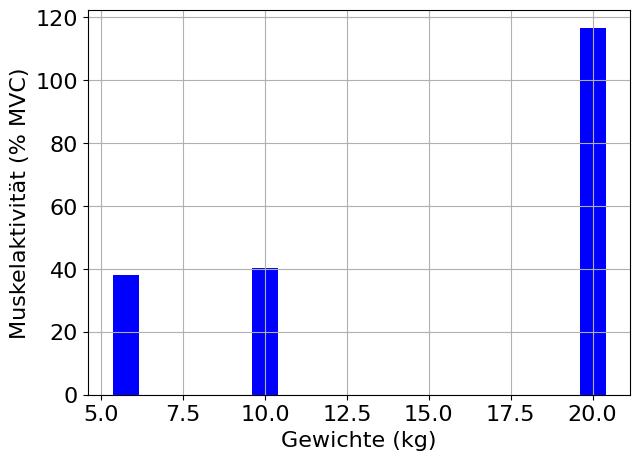

In [6]:
weights = [5.75, 10, 20]
activations = [np.mean(j_w_env[s:e]) for s, e in zip(j_w_s, j_w_e)]
rel_act = [(act / mvc_j) * 100 for act in activations]  

plt.figure(figsize=(7,5))
# histogram

plt.bar(weights, rel_act, color='blue')
#plt.title('Abgabe 3 - Punkt 5: Muskelaktivität vs. Gewicht (Janick)', fontweight='bold')
plt.xlabel('Gewichte (kg)')
plt.ylabel('Muskelaktivität (% MVC)')
plt.grid(True)
plt.savefig('Abgabe_5.png')
plt.show()


## Aufgabe 6 Leistungskurver

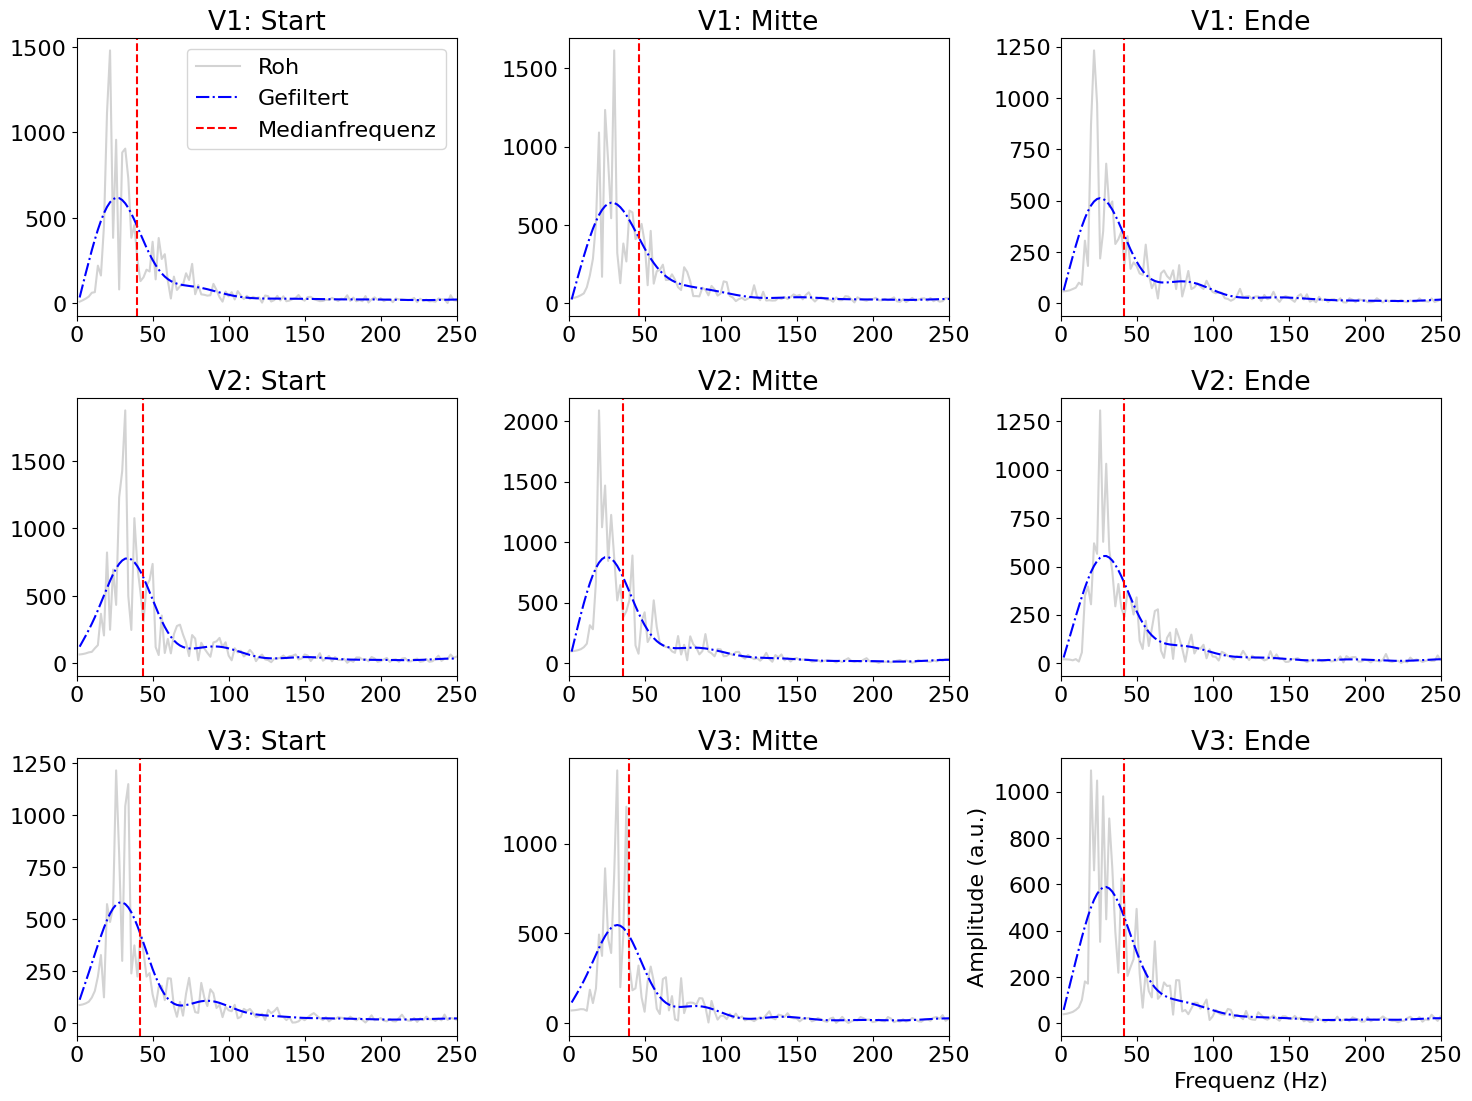

In [7]:

# --- PLOT 3 & 4: Punkt 6 & 8 (Ermüdung) ---
med_freqs = np.zeros((3, 3))
win_len = int(0.5 * SFREQ)

fig, ax = plt.subplots(3, 3, figsize=(15, 12))
#plt.suptitle('Abgabe 3 - Punkt 6: Leistungsspektren bei Ermüdung (Janick)', fontsize=16, fontweight='bold')

for i in range(3):
    start = j_fat_s[i]
    end = j_fat_e[i]
    dur = end - start
    idxs = [start, start + dur//2 - win_len//2, end - win_len]
    
    for k, idx in enumerate(idxs):
        idx = int(idx)
        if idx < 0 or idx+win_len > len(j_fat_filt): continue
        chunk = j_fat_filt[idx : idx + win_len]
        fft = np.abs(np.fft.fft(chunk))
        freqs = np.fft.fftfreq(len(chunk), 1/SFREQ)
        mask = freqs > 0
        p, f = fft[mask], freqs[mask]
        b, a = scipy.signal.butter(4, 40, btype='lowpass', fs=SFREQ)
        p_smooth = scipy.signal.filtfilt(b, a, p)
        area = scipy.integrate.cumulative_trapezoid(p, f, initial=0)
        mf = f[np.where(area >= area[-1]/2)[0][0]] if area[-1] > 0 else 0
        med_freqs[i, k] = mf
        
        ax[i,k].plot(f, p, color='lightgray', label='Roh')
        ax[i,k].plot(f, p_smooth, color='blue', linestyle='-.', label='Gefiltert')
        ax[i,k].axvline(mf, color='red', linestyle='--', label=f'Medianfrequenz')
        ax[i,k].set_xlim(0, 250)
        ax[i,k].set_title(f'V{i+1}: {["Start", "Mitte", "Ende"][k]}')
        if i==0 and k==0: ax[i,k].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.rcParams.update({'font.size': 16})
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude (a.u.)')
plt.savefig('Abgabe_6.png')
plt.show()

## Aufgabe 7 Frequenzgehalt


## Aufgabe 8: Medianfrequenz dargestellt

C:\Users\janic\AppData\Local\Temp\ipykernel_772\2439415000.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(labels, med_freqs[i], '-o', linestyle=linestyles[i], label=f'Versuch {i+1}')


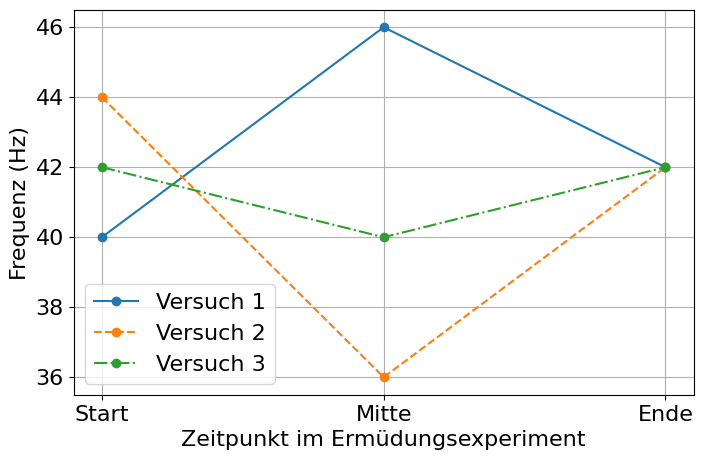

In [8]:
plt.figure(figsize=(8,5))
labels = ['Start', 'Mitte', 'Ende']
linestyles = ['-', '--', '-.']
for i in range(3):
    plt.plot(labels, med_freqs[i], '-o', linestyle=linestyles[i], label=f'Versuch {i+1}')
#plt.title('Abgabe 3 - Punkt 8: Verlauf der Medianfrequenz (Janick)', fontweight='bold')
plt.ylabel('Frequenz (Hz)')
plt.xlabel('Zeitpunkt im Ermüdungsexperiment')
plt.legend()
plt.grid(True)
plt.savefig('Abgabe_8.png')
plt.show()